# Analise e Predições de Ataques Cardiacos

Um ataque cardíaco ocorre quando os músculos do coração não recebem oxigênio suficiente devido a um bloqueio em uma ou mais artérias coronárias. Esses bloqueios são basicamente o acúmulo de placa que consiste em gorduras, colesterol, etc. O músculo cardíaco que perdeu o suprimento de sangue eventualmente morre e esta condição é muito perigosa e fatal.
Neste estudo vamos investigar a probabilidade de uma pessoa ter ataque cardiaco.

Neste Exércicio iremos abordar os seguintes tópicos:
- Analise Exploratoria
- Fazer modelos SVM, RF e RegLog para classificar o contexto
- Melhorar os modelos com base  no Hiperparametros

Faça o que se pede em cada bloco comentado ⚠⚠⚠ !

### Descrição do dataset <https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset>
    
<p style="font-family: 'Poppins', sans-serif; font-weight:300; font-size: 16px">
1. Age : Age of the patient<br>
2. Sex : Sex of the patient<br>
3. exang: exercise induced angina (1 = yes; 0 = no)<br>
4. ca: number of major vessels (0-3)<br><br>
5. cp : Chest Pain type chest pain type<br><br>
Value 0: typical angina<br>
Value 1: atypical angina<br>
Value 2: non-anginal pain<br>
Value 3: asymptomatic<br><br>
6. trtbps : resting blood pressure (in mm Hg)<br>
7. chol : cholestoral in mg/dl fetched via BMI sensor<br>
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br><br>
9. rest_ecg : resting electrocardiographic results<br><br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br><br>
10. thalach : maximum heart rate achieved<br>
11. target : 0= less chance of heart attack 1= more chance of heart attack<br>
12. thall: Thalium Stress Test result ~ (0,3)<br>
13. slp: Slope</p>

In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


# 1. Análise exploratória de dados

In [1]:
# Importando os módulos
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Carregando o dataset


<p style="font-family: 'Poppins', sans-serif; text-align: left; font-size: 16px; font-weight:300">A coluna OUTPUT é o nosso target.</p>

### ⚠ Verifique se há dados duplicados, caso positivo remova as duplicatas e reset os index

### ⚠ Exiba uma figura identificando a correlação entre todas as variáveis.

## 2. Processando os dados

### ⚠ Separe as caracteristicas da target e posteriormente faça a divisão de treino e teste com 20% ou 30% dos dados para teste

## 3. Construindo e treinando o modelo

### - Logistic Regression (Exemplo)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [4]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)
predictions1 = logmodel.predict(X_test)

In [64]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[33  9]
 [ 8 41]]


              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.82      0.84      0.83        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [65]:
logmodel_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logmodel_acc)

Accuracy of the Logistic Regression Model is:  0.8131868131868132


### ⚠ - Execute e exiba os mesmo resultados anteriosres utilizando o algoritmo Random Forest

In [6]:
#Dica
from sklearn.ensemble import RandomForestClassifier

### ⚠ - Tente melhorar a acurácio do random Forest utilizando o Grid Search

In [7]:
#Dica
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [3, 4, 5, 6, 7],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20,35, 50,75, 100]
}

### ⚠ - Execute e exiba os mesmo resultados anteriosres utilizando o algoritmo Support Vector Machines (SVM)

In [8]:
#Dica
from sklearn.svm import SVC

### ⚠ - Tente melhorar a acurácio do SVM utilizando o Grid Search

In [11]:
#Dica
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

### ⚠ - Liste os seus melhores resultados para cada algoritmo e compare com os resultados apresentados abaixo!

# 4. Resultados

In [41]:
print("Accuracy of Logistic Regression Model is: ",logmodel_acc*100,"%")
print("Accuracy of Random Forests Model is: ",rfc_acc*100,"%")
print("Accuracy of SVM Model is: ",svm_acc*100,"%")

Accuracy of Logistic Regression Model is:  81.31868131868131 %
Accuracy of Random Forests Model is:  85.71428571428571 %
Accuracy of SVM Model is:  80.21978021978022 %


<AxesSubplot:>

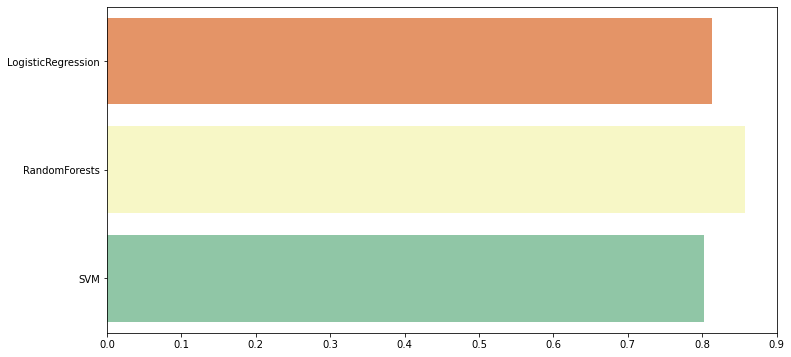

In [42]:
plt.figure(figsize=(12,6))
model_acc = [logmodel_acc, rfc_acc, svm_acc]
name_of_model = ['LogisticRegression', 'RandomForests', 'SVM']
sns.barplot(x= model_acc, y=name_of_model, palette='Spectral')